### <font color=darkred>  Singular Value Decomposition applied to image compression </font>

Text(0.5,1,'Polar bears')

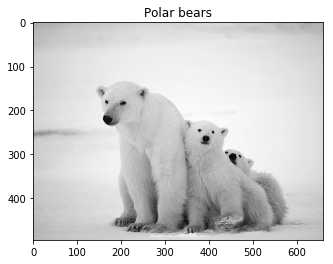

In [2]:
# import packages and display image
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

polar_bears           = Image.open('./polar_bears.jpg')

polar_bears_mat       = np.array(list(polar_bears.getdata(band=0)), float)
polar_bears_mat.shape = (polar_bears.size[1], polar_bears.size[0])
polar_bears_mat       = np.matrix(polar_bears_mat)

plt.figure(figsize=(6,4))
plt.imshow(polar_bears_mat, cmap='gray')
plt.title("Polar bears")

Size left singular eigenvectors  (495, 495)
Size right singular eigenvectors  (660, 660)
Size eigenvalues matrix (495,)


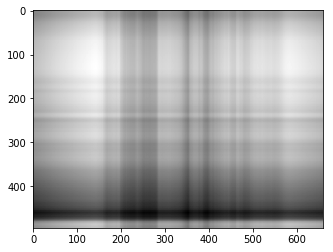

In [5]:
# Perform Singular Value Decomposition
U, sigma, V = np.linalg.svd(polar_bears_mat)
print('Size left singular eigenvectors  ' + str(np.shape(U)))
print('Size right singular eigenvectors  ' + str(np.shape(V)))
print('Size eigenvalues matrix ' + str(np.shape(sigma)))

# Image reconstitution with the largest singular value
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray')
#plt.title("Image reconstruction with the largest singular value only")

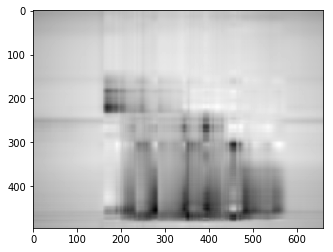

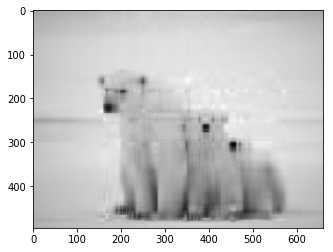

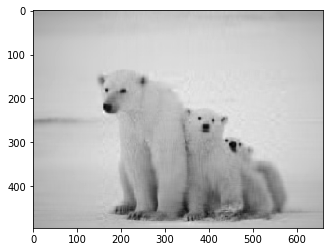

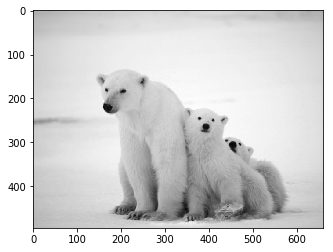

In [7]:
nb_singular_values = np.array([5,10,25,100])
k = 0
for i in nb_singular_values:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    #title = "Image reconstruction with the " + "n = %s" % i +" largest singular values"
    #plt.title(title)
    plt.show()